### Problem Statement:
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
import pickle

In [2]:
#Loading Dataset
avo=pd.read_csv('/Users/RahulK/Downloads/avocado.csv')
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
avo.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No Null value is present in dataset

In [5]:
avo.duplicated().sum()

0

No Duplicate Data

In [7]:
numeric_features=[features for features in avo.columns if avo[features].dtype!='O']

print('No.Of Numeric Features Are:',len(numeric_features))
numeric_features

No.Of Numeric Features Are: 11


['Unnamed: 0',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

In [8]:
categorical_features=[features for features in avo.columns if avo[features].dtype == 'O']
print("No Of Categorical Features",len(categorical_features))
categorical_features

No Of Categorical Features 3


['Date', 'type', 'region']

In [9]:
year_features=[features for features in numeric_features if 'year' in features]
year_features

['year']

In [10]:
discrete_features=[features for features in numeric_features if len(avo[features].unique())<25 and features not in year_features]
discrete_features

[]

In [11]:
continue_features=[feature for feature in numeric_features if feature not in discrete_features+year_features]
continue_features

['Unnamed: 0',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

## Visualisation

<Axes: >

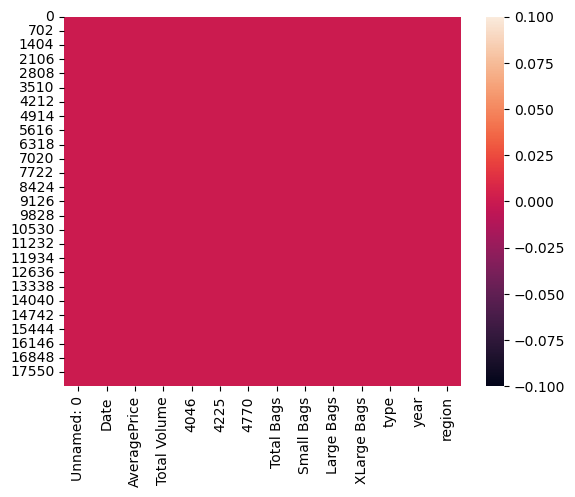

In [12]:
sns.heatmap(avo.isna())

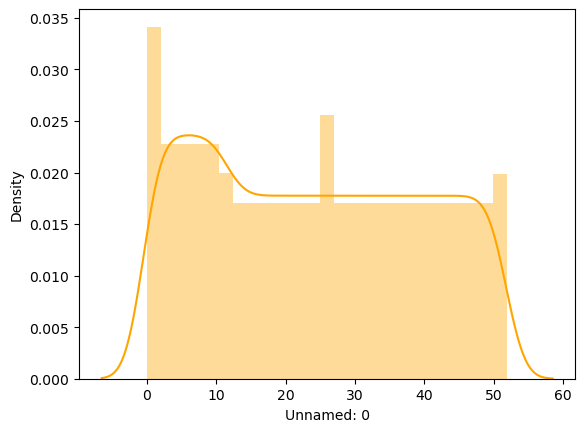

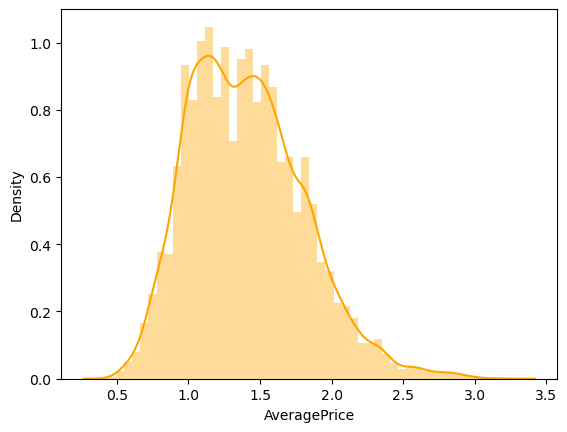

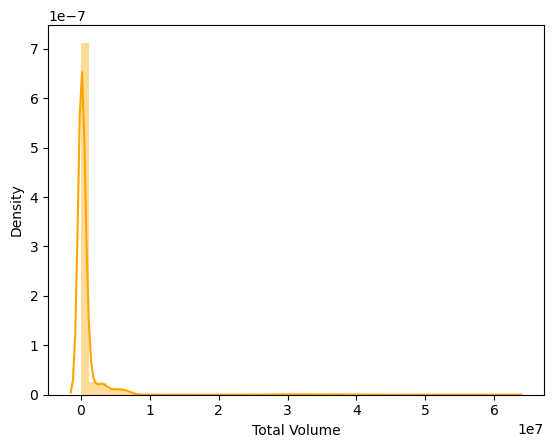

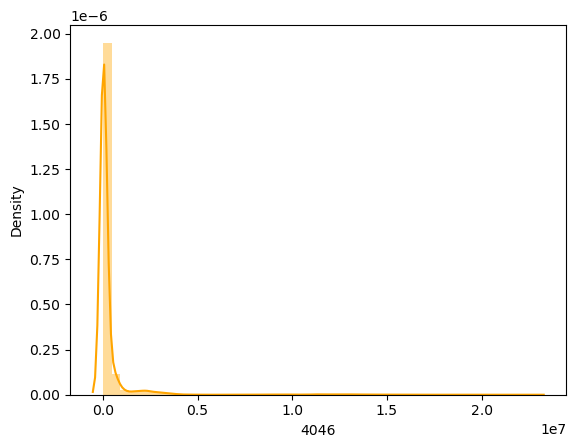

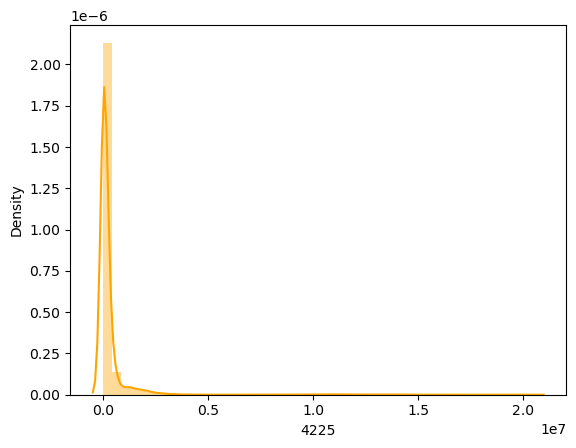

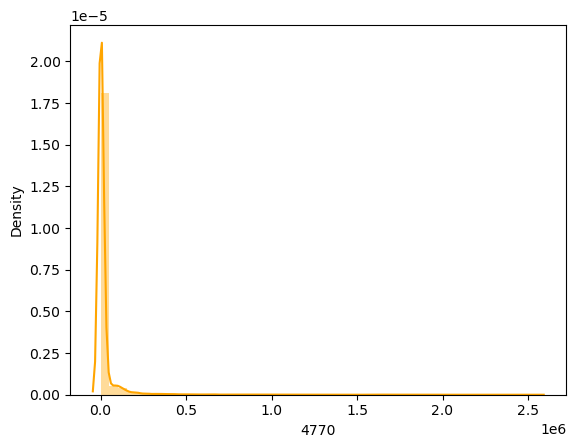

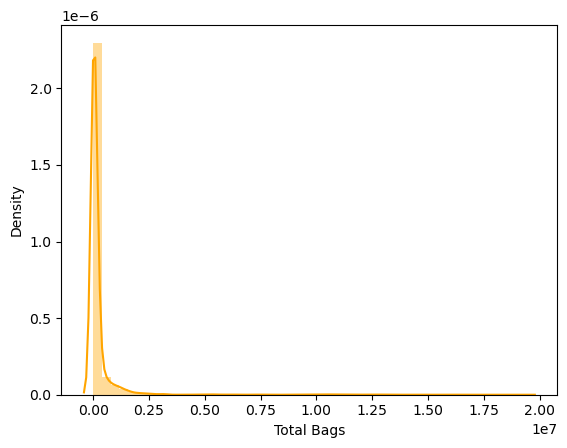

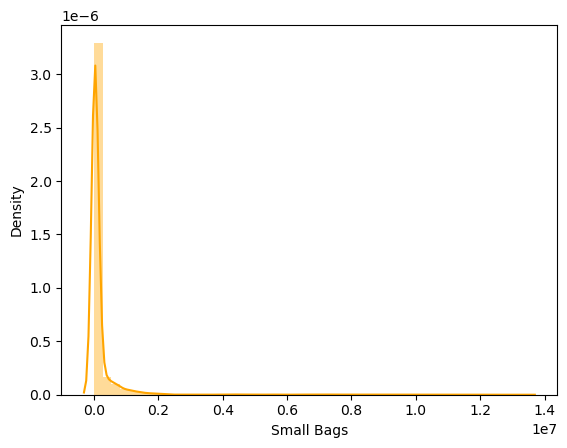

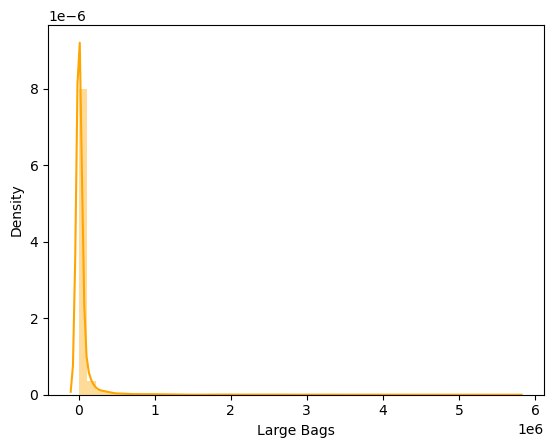

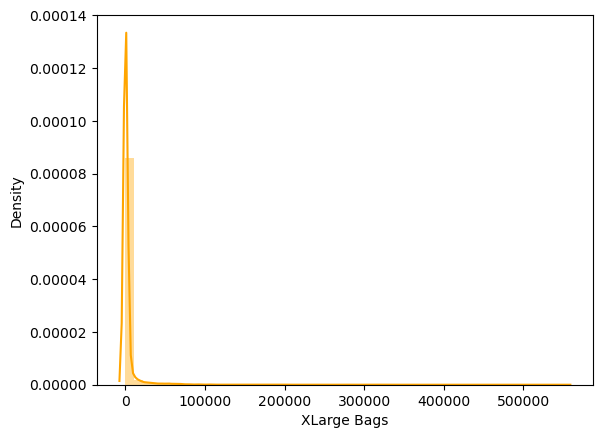

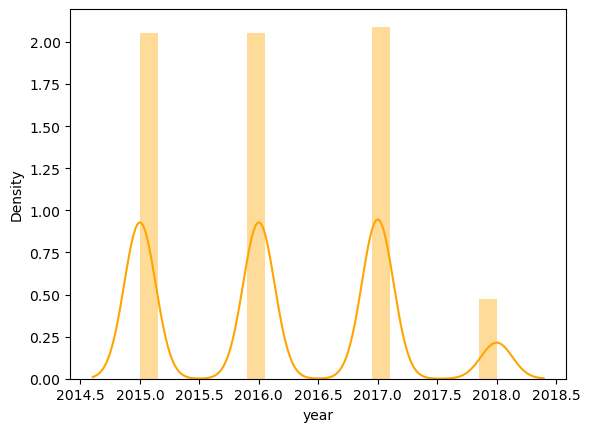

In [15]:
for i in numeric_features:
    plt.figure()
    sns.distplot(avo[i],color='orange')

Number Of Each Type
 conventional    9126
organic         9123
Name: type, dtype: int64


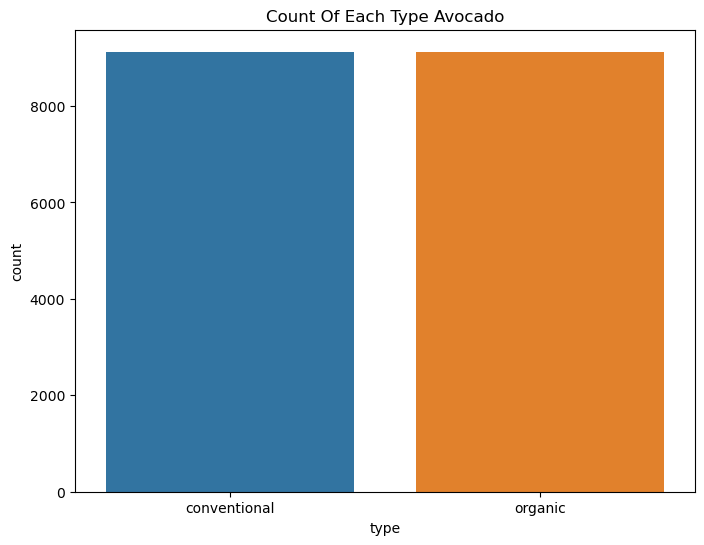

In [19]:
avo['type'] = avo['type'].astype('category')

print("Number Of Each Type\n", avo['type'].value_counts())

plt.figure(figsize=(8, 6))
plt.title('Count Of Each Type Avocado')
sns.countplot(x='type', data=avo)
plt.show()

<Axes: title={'center': 'Price Of  Type Of Avacado'}, xlabel='type', ylabel='AveragePrice'>

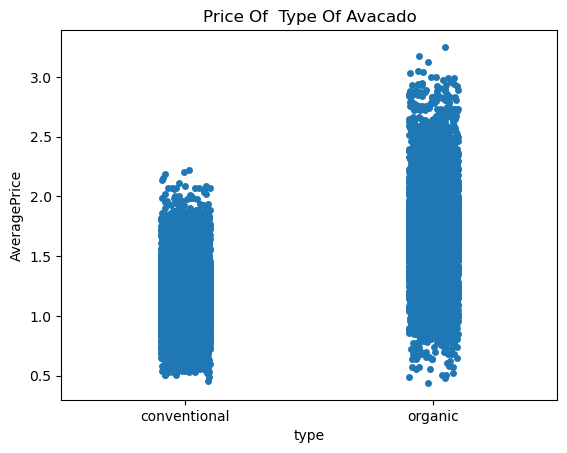

In [20]:
plt.title('Price Of  Type Of Avacado')
sns.stripplot(x='type',y='AveragePrice',data=avo)

Text(0.5, 1.0, 'Type vs Total Volume')

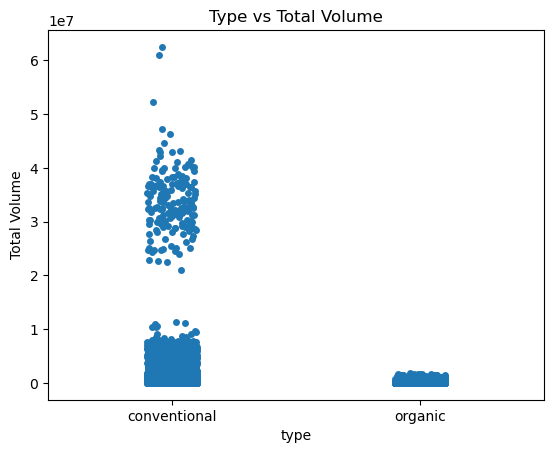

In [21]:
sns.stripplot(x='type',y='Total Volume',data=avo)
plt.title('Type vs Total Volume')

The plot shows that conventional having high volume as compared to organic

<Axes: title={'center': 'AVERAGE PRICE PER YEAR'}, xlabel='year', ylabel='AveragePrice'>

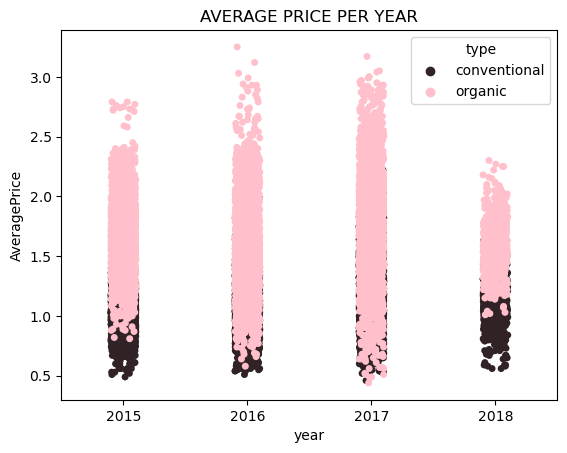

In [22]:
plt.title("AVERAGE PRICE PER YEAR")
sns.stripplot(x='year',y='AveragePrice',data=avo,hue='type',color='pink')

In the year 2016-17 it is too expensive and 2018 is least expensive

<Axes: title={'center': 'AVACADO PRICE IN EACH REGION'}, xlabel='region', ylabel='AveragePrice'>

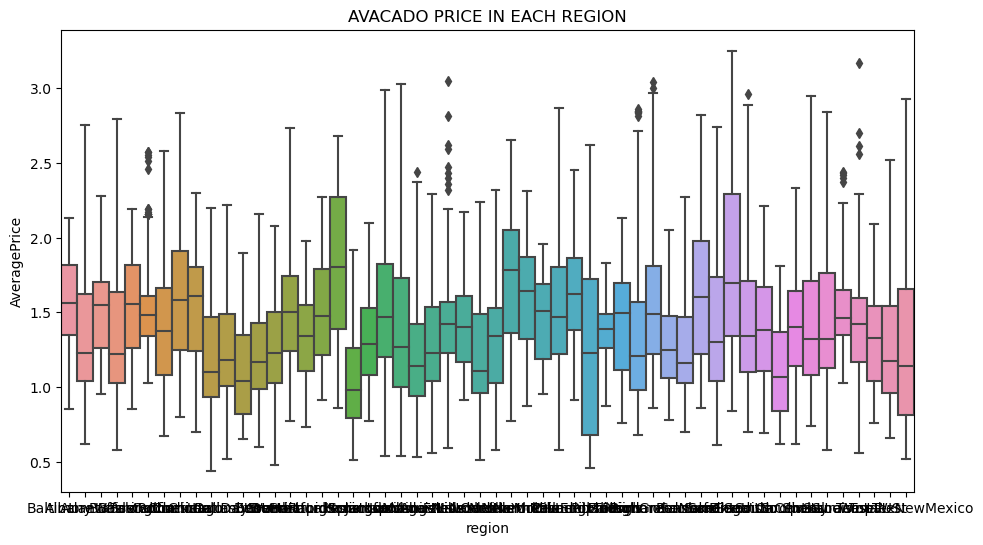

In [24]:
plt.figure(figsize=(11,6))
plt.title('AVACADO PRICE IN EACH REGION')
plt.xlabel('Region')
sns.boxplot(y=avo['AveragePrice'],x=avo['region'],data=avo,width=1,whis=2)

<Axes: xlabel='Total Volume', ylabel='region'>

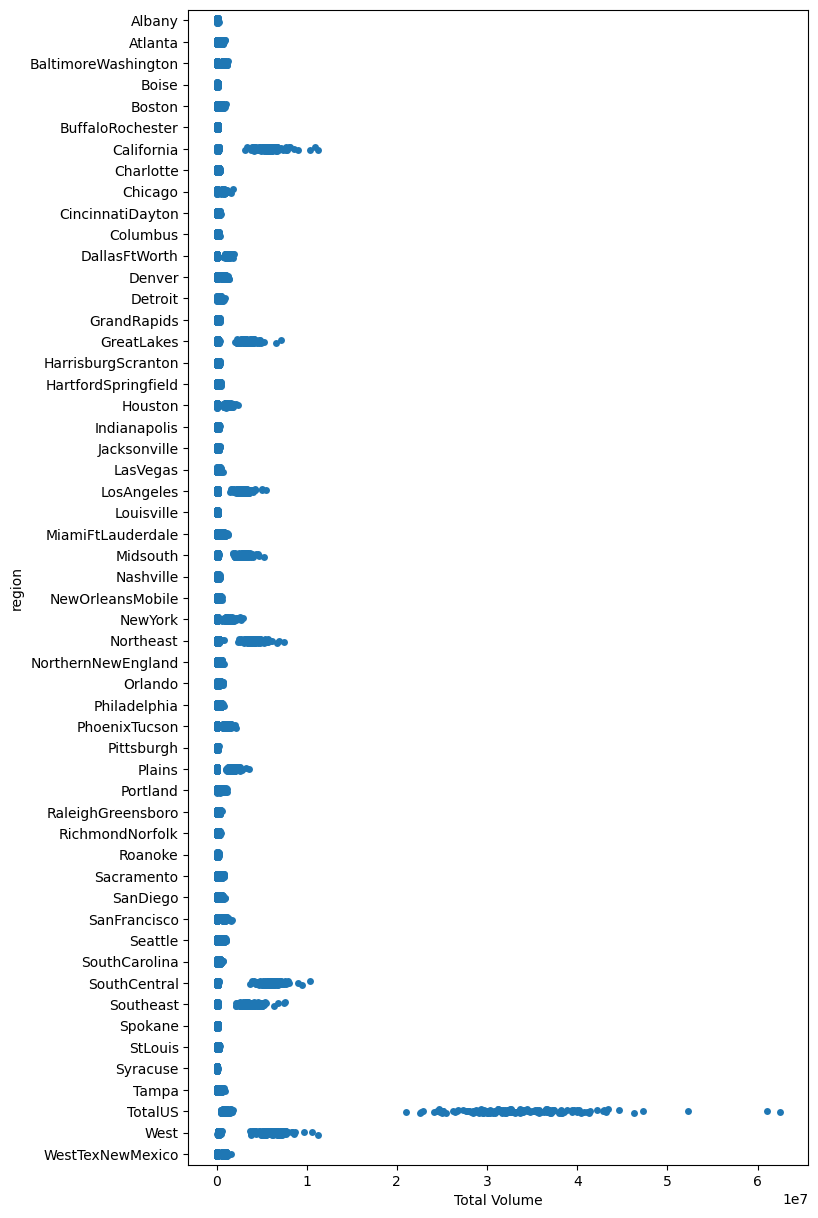

In [25]:
plt.figure(figsize=(8,15))
sns.stripplot(x='Total Volume',y='region',data=avo)

In [26]:
print("We have all USA states that is : ",avo['region'].nunique())

We have all USA states that is :  54


In [27]:
avo['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Text(0.5, 1.0, 'Type Average Price in Each Region')

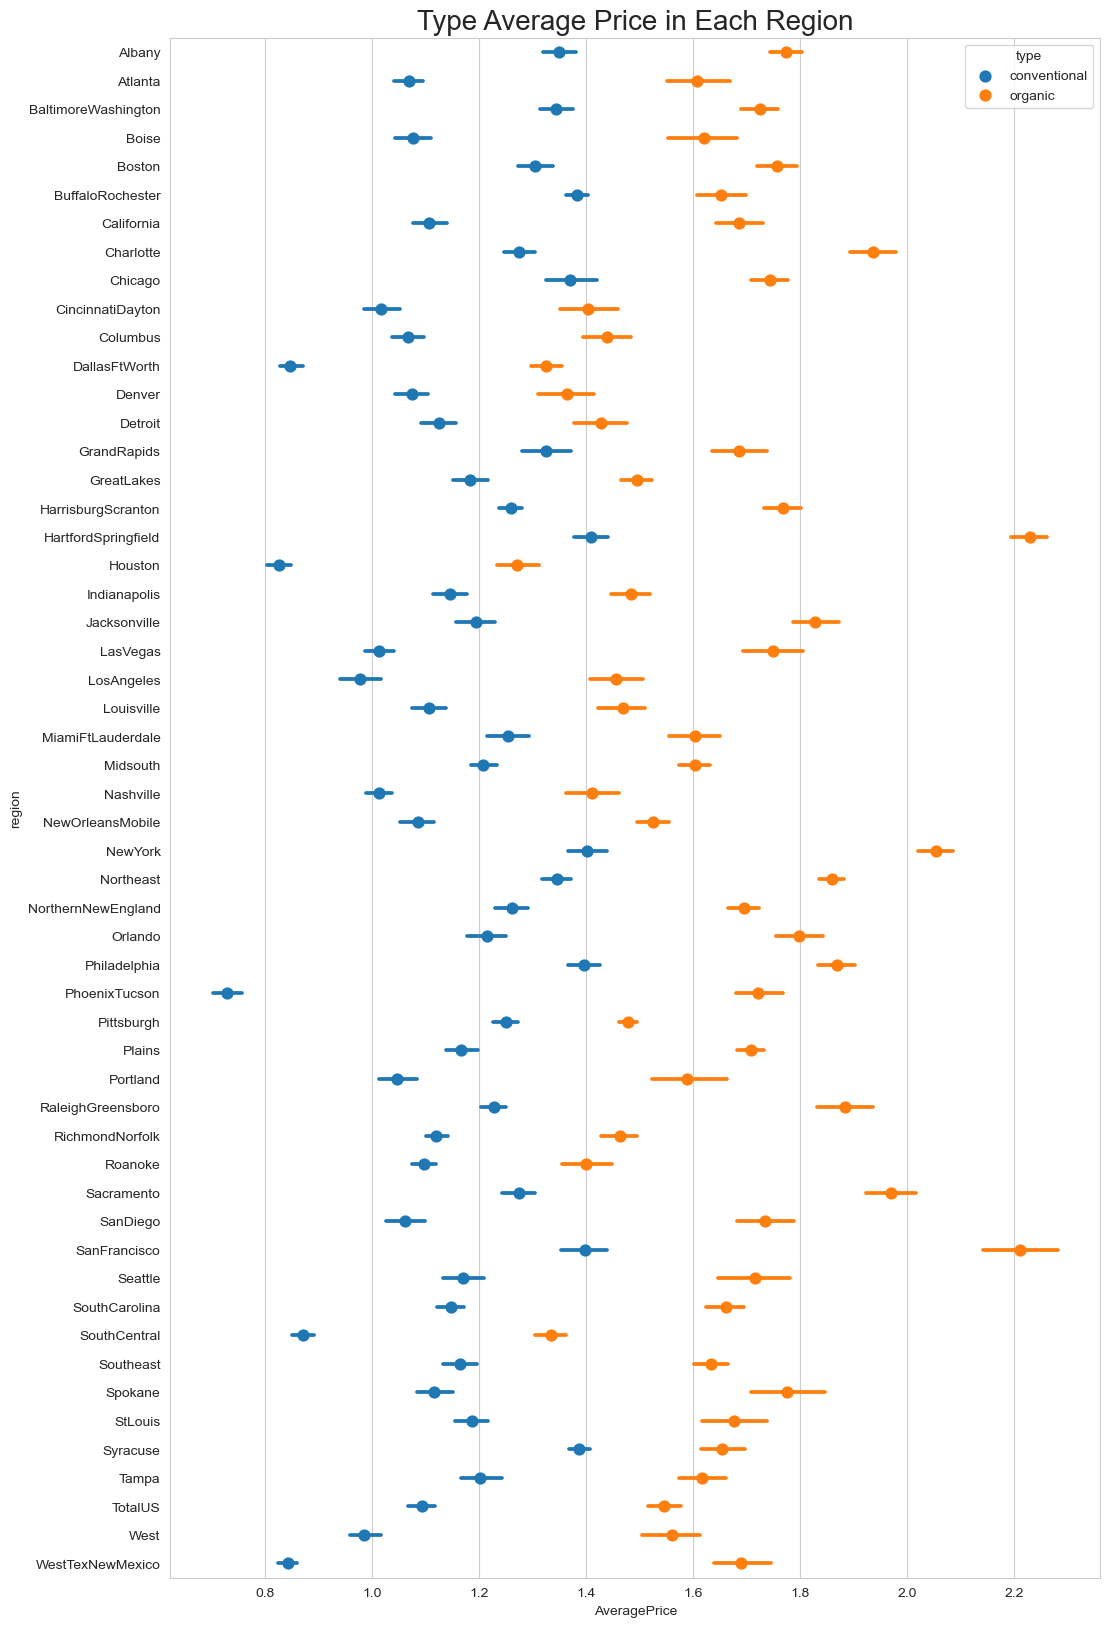

In [28]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=avo, hue='type',join=False)
plt.title("Type Average Price in Each Region",{'fontsize':20})

<Axes: xlabel='Date', ylabel='AveragePrice'>

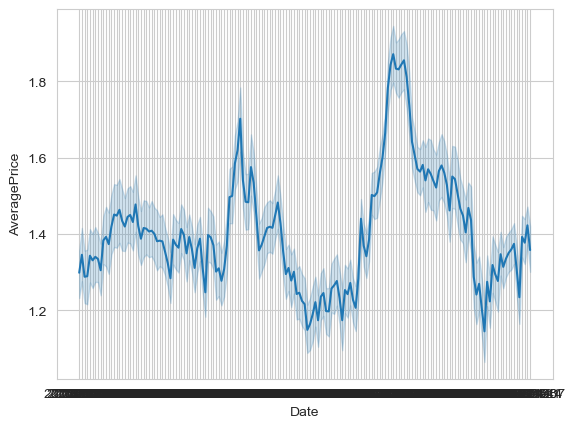

In [29]:
sns.lineplot(x='Date',y='AveragePrice',data=avo)

The price of avocados fluctuates, meaning it increases in some months and decreases in others

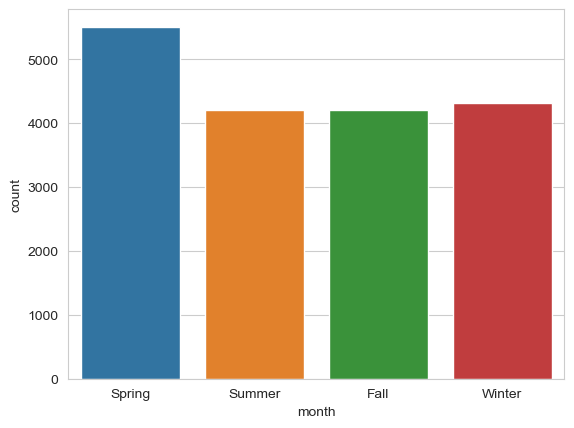

In [30]:
avo['month'] = pd.DatetimeIndex(avo['Date']).month
interval=(0,3,6,9,12)
categories=('Spring','Summer','Fall','Winter')
avo['month']=pd.cut(avo.month,interval,labels=categories)
ax=sns.countplot(x=avo['month'],data=avo)

We see that in the spring season, volume increases

In [31]:
lb=LabelEncoder()

In [32]:
for i in categorical_features:
    avo[i]=lb.fit_transform(avo[i])

In [33]:
avo['month']=lb.fit_transform(avo['month'])
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,3
1,1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,3
2,2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,3
3,3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,3
4,4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,1
18245,8,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,9,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,10,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


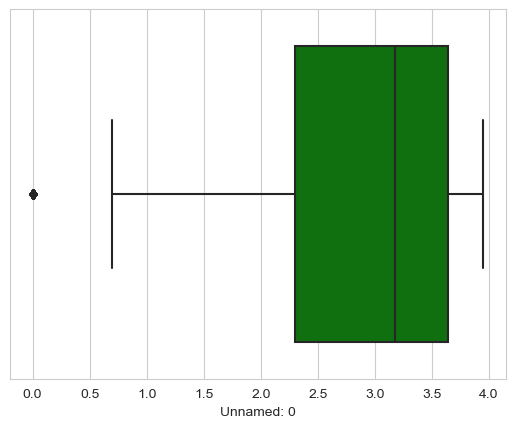

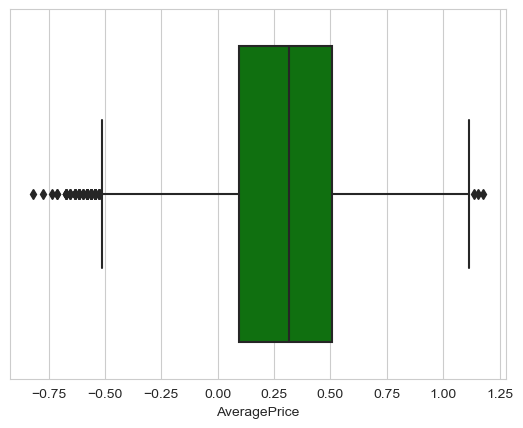

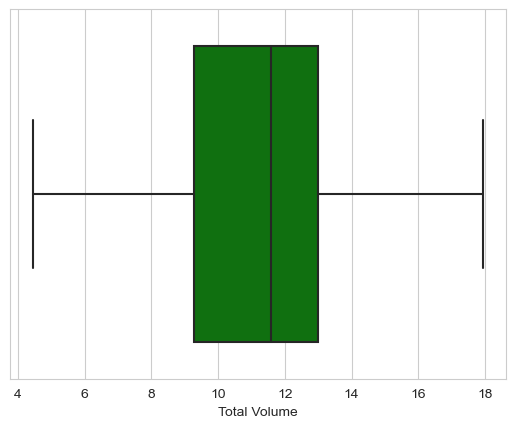

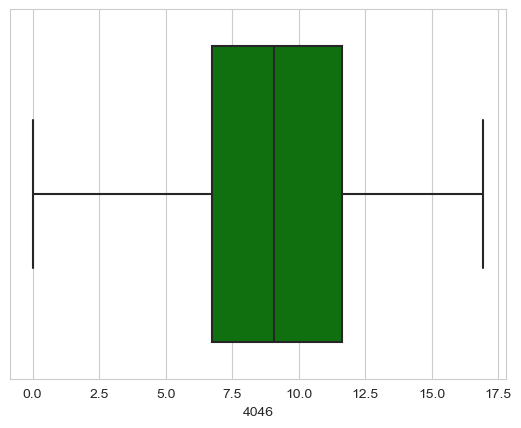

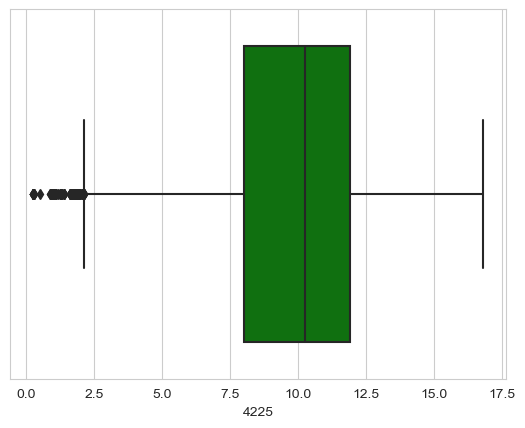

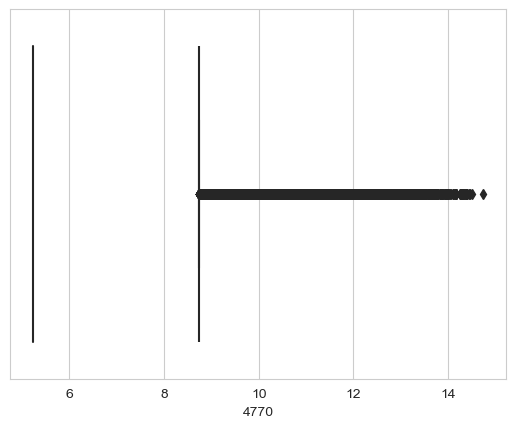

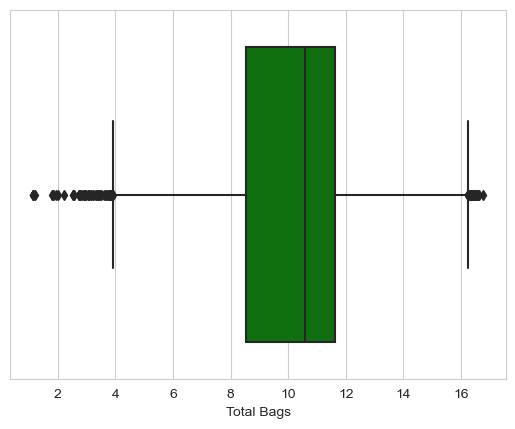

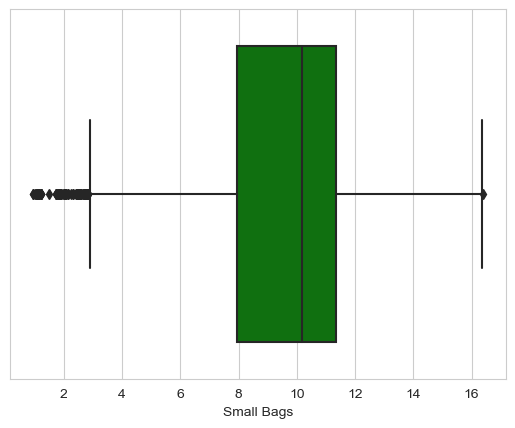

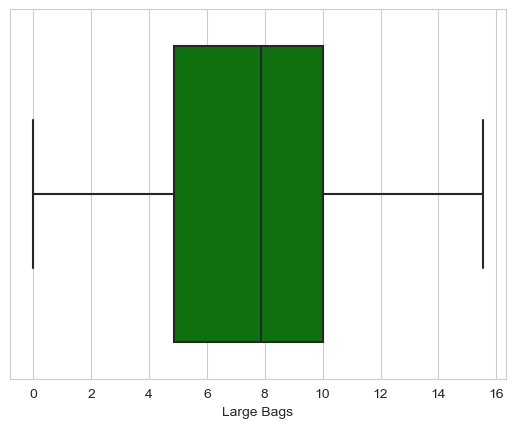

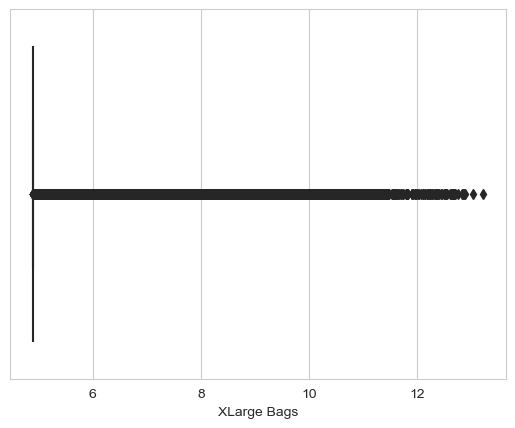

In [36]:
for features in continue_features:
    data=avo.copy()
    data[features]=np.log(data[features])
    plt.figure()
    sns.boxplot(x=features,data=data,color='green')

In [37]:
avo.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
count,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,1.473231
std,15.481045,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,1.088257
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,0.000000
25%,10.000000,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,1.000000
50%,24.000000,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,1.000000
75%,38.000000,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,2.000000
max,52.000000,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,3.000000


<Axes: >

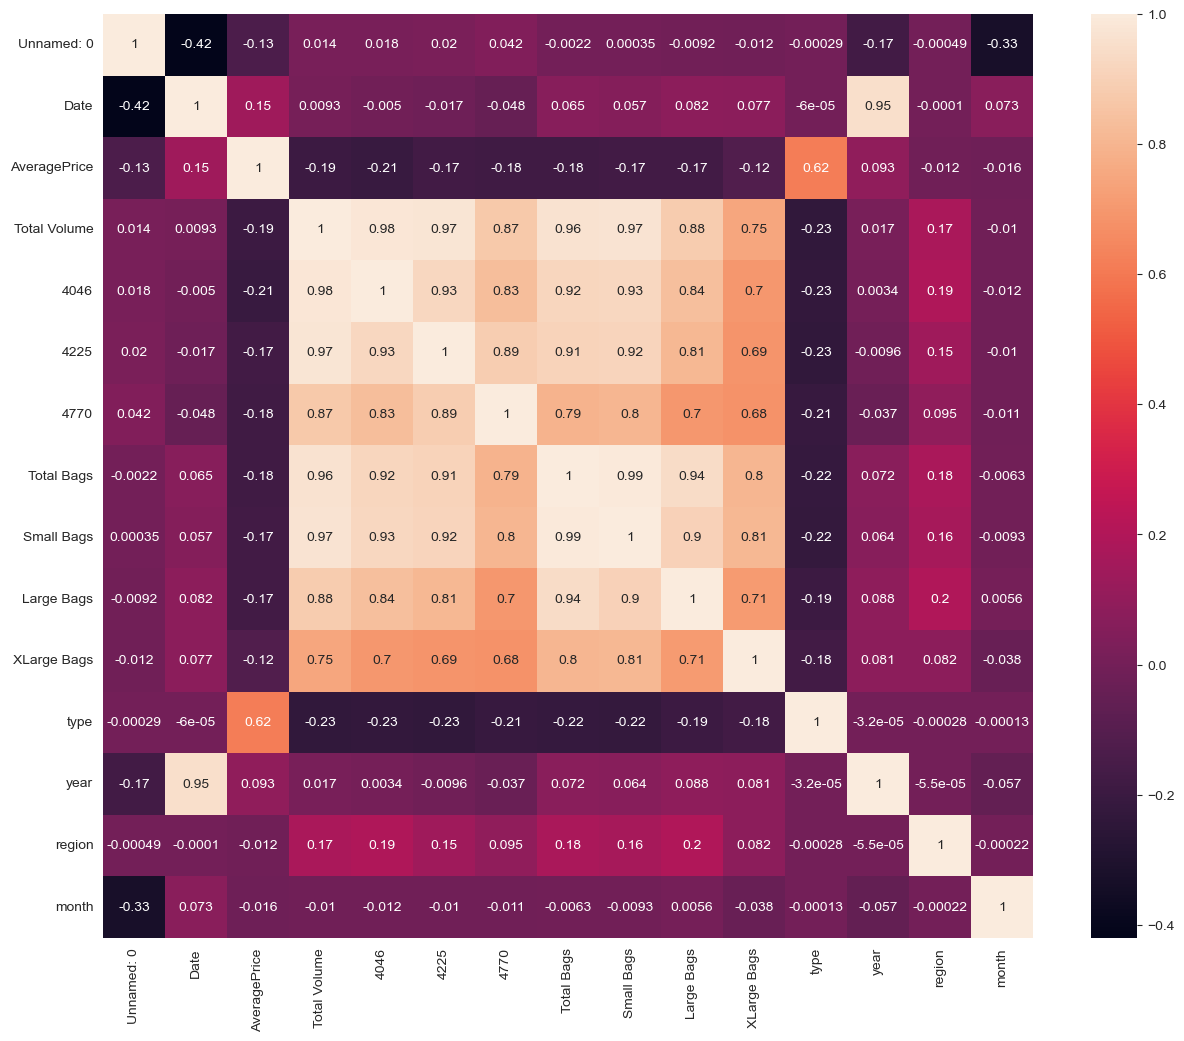

In [39]:
corr=avo.corr()
corr
plt.figure(figsize=(15,12))
sns.heatmap(data=corr,annot=True)

## VIF

In [40]:
def valcal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(avo.values,i) for i in range(avo.shape[1])]
    vif['features']=avo.columns
    print(vif)

In [41]:
valcal()

      vif factor      features
0   4.790122e+00    Unnamed: 0
1   5.152013e+00          Date
2   2.304473e+01  AveragePrice
3   5.230276e+09  Total Volume
4   6.970780e+08          4046
5   6.354666e+08          4225
6   4.990439e+06          4770
7   2.502000e+14    Total Bags
8   1.429714e+14    Small Bags
9   1.521486e+13    Large Bags
10  7.857011e+10   XLarge Bags
11  3.408048e+00          type
12  3.449279e+01          year
13  4.162541e+00        region
14  3.231251e+00         month


## Data Cleaning

In [42]:
avo.skew()

Unnamed: 0       0.108334
Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.082273
dtype: float64

In [43]:
clean=pd.DataFrame()

In [44]:
clean['columns']=['total volumn','total bags']
clean['vif']=['5.23','2.35']
clean['skewness']=['9.00','9.57']
clean['outliers']=['more','more']
clean

,columns,vif,skewness,outliers
0,total volumn,5.23,9.00,more
1,total bags,2.35,9.57,more


In [45]:
avo.drop(['Total Bags','Total Volume'],axis=1,inplace=True)
avo

,Unnamed: 0,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,51,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,3
1,1,50,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,3
2,2,49,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,3
3,3,48,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,3
4,4,47,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,161,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,53,1
18245,8,160,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,53,1
18246,9,159,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,53,1
18247,10,158,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,53,1


## Removing Outliers

In [46]:
z=np.abs(zscore(avo))

In [47]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428]), array([3, 3, 8, ..., 2, 2, 2]))


In [48]:
avo_new=avo[(z<3).all(axis=1)]

In [49]:
avo_new.shape

(17651, 13)

In [50]:
avo.shape

(18249, 13)

In [51]:
loss_of_data=(18249-17651)/17651*100
loss_of_data

3.3879100334258685

In [52]:
avo=avo_new

In [53]:
avo.skew()

Unnamed: 0      0.106116
Date            0.013714
AveragePrice    0.377432
4046            4.909848
4225            4.455745
4770            5.117170
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
month           0.081232
dtype: float64

In [54]:
s=['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']

In [55]:
for i in s:
    avo[i]=np.sqrt(avo[i])

In [56]:
avo.skew()

Unnamed: 0      0.106116
Date            0.013714
AveragePrice    0.377432
4046            2.497504
4225            2.128505
4770            2.636658
Small Bags      2.093752
Large Bags      2.236756
XLarge Bags     3.312484
type           -0.037741
year            0.229976
region          0.012798
month           0.081232
dtype: float64

In [57]:
x1=avo.drop(['Unnamed: 0','region','Date'],axis=1)

In [58]:
x1

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,month
0,1.33,32.198447,233.355630,6.939741,92.755701,9.656604,0.0,0,2015,3
1,1.35,25.966902,211.278986,7.637408,96.995206,9.873702,0.0,0,2015,3
2,0.93,28.190424,330.378071,11.423660,89.678370,10.155787,0.0,0,2015,3
3,1.08,33.645208,268.284196,8.519390,75.348524,11.565466,0.0,0,2015,3
4,1.28,30.683546,209.376193,8.705171,77.370925,14.060228,0.0,0,2015,3
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,45.243342,39.104987,0.000000,114.310192,20.781001,0.0,1,2018,1
18245,1.71,34.521008,58.579006,0.000000,94.551785,18.022209,0.0,1,2018,1
18246,1.87,34.524194,49.525650,26.980363,96.704705,6.504614,0.0,1,2018,1
18247,1.93,39.084908,54.598901,26.963123,104.496603,7.071068,0.0,1,2018,1


In [59]:
y1=avo['region']

## Model Building

In [60]:
std=StandardScaler()

In [61]:
X1=std.fit_transform(x1)

In [62]:
x1=X1

In [63]:
x1

array([[-0.19535234, -0.61273656, -0.10350777, ..., -1.01904715,
        -1.21001338,  1.40117505],
       [-0.1435096 , -0.63220124, -0.17505138, ..., -1.01904715,
        -1.21001338,  1.40117505],
       [-1.2322071 , -0.62525591,  0.21091212, ..., -1.01904715,
        -1.21001338,  1.40117505],
       ...,
       [ 1.20440158, -0.60547192, -0.6992442 , ...,  0.98130886,
         1.98075592, -0.43655276],
       [ 1.35992979, -0.5912262 , -0.68280335, ...,  0.98130886,
         1.98075592, -0.43655276],
       [ 0.55636736, -0.54525295, -0.70243844, ...,  0.98130886,
         1.98075592, -0.43655276]])

### Considering a classification problem, the target variable is set to 'Region'

In [64]:
lg=LogisticRegression()

In [65]:
for i in range(1,50):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    lg.fit(x1_train,y1_train)
    pred_test=lg.predict(x1_test)
    pred_train=lg.predict(x1_train)
    if round(accuracy_score(y1_test,pred_test)*100,1)==round(accuracy_score(y1_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y1_test,pred_test)*100)
        print('train score',accuracy_score(y1_train,pred_train)*100)

Random state 4 score is well
test score 49.27782497875956
train score 49.27762039660057


In [66]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=4)

In [67]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
nb=MultinomialNB()

In [68]:
def fun(f):
    f.fit(x1_train,y1_train)
    pred=f.predict(x1_test)
    print('Accuracy Score',accuracy_score(y1_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y1_test,pred))
    print('Classification Report\n',classification_report(y1_test,pred))
    print('F1 score',f1_score(y1_test,pred,average='micro'))

In [69]:
fun(svc)

Accuracy Score 0.6128575474369867
Confusion Matrix
 [[43  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 47 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  4  1 ...  0  0 35]]
Classification Report
               precision    recall  f1-score   support

           0       0.42      0.61      0.50        70
           1       0.47      0.49      0.48        55
           2       0.61      0.71      0.66        66
           3       1.00      0.54      0.70        69
           4       0.77      0.80      0.78        61
           5       0.79      0.42      0.55        72
           6       0.93      0.91      0.92        78
           7       0.66      0.61      0.63        75
           8       0.83      0.93      0.88        70
           9       0.50      0.70      0.58        66
          10       0.42      0.43      0.43        76
          11       0.59      0.75      0.66        71
          12       0.72      0.68      0.70        57
          13

In [70]:
fun(dtc)

Accuracy Score 0.8085528178986123
Confusion Matrix
 [[57  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  1]
 [ 0  0 59 ...  0  0  2]
 ...
 [ 0  0  0 ... 38  1  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  2  0 ...  0  0 54]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        70
           1       0.72      0.76      0.74        55
           2       0.88      0.89      0.89        66
           3       0.81      0.80      0.80        69
           4       0.83      0.89      0.86        61
           5       0.76      0.76      0.76        72
           6       0.99      0.99      0.99        78
           7       0.79      0.77      0.78        75
           8       0.90      0.87      0.88        70
           9       0.85      0.71      0.78        66
          10       0.73      0.68      0.71        76
          11       0.88      0.82      0.85        71
          12       0.92      0.82      0.87        57
          13

In [71]:
fun(knn)

Accuracy Score 0.7116964032851884
Confusion Matrix
 [[51  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  0  0 ...  0  0 45]]
Classification Report
               precision    recall  f1-score   support

           0       0.55      0.73      0.63        70
           1       0.42      0.67      0.51        55
           2       0.79      0.86      0.83        66
           3       0.65      0.74      0.69        69
           4       0.81      0.93      0.87        61
           5       0.59      0.60      0.59        72
           6       0.91      0.95      0.93        78
           7       0.68      0.69      0.69        75
           8       0.92      0.93      0.92        70
           9       0.59      0.62      0.61        66
          10       0.48      0.59      0.53        76
          11       0.72      0.76      0.74        71
          12       0.79      0.81      0.80        57
          13

In [72]:
param={'kernel':['linear','rbf','poly','sigmoid']}
gd=GridSearchCV(svc,param,cv=5)
gd.fit(x1,y1)
print(gd.best_params_)

{'kernel': 'linear'}


In [73]:
param={'criterion':['ginny','entropy'],'splitter':['best','random'],'max_features':['none','auto','sqrt','log2'],'max_depth':[1,2,3,4,5]}
gd=GridSearchCV(dtc,param)
gd.fit(x1,y1)
print(gd.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'splitter': 'best'}


In [74]:
param={'n_neighbors':[7,5,11],'weights':['uniform','distance'],'algorithm':['auto','bell_tree','kd_tree','brute']}
gd=GridSearchCV(knn,param)
gd.fit(x1,y1)
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [75]:
svc1=SVC(kernel='linear')
dtc1=DecisionTreeClassifier(criterion='entropy',max_features='log2',splitter='random',max_depth=5)
knn1=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto')
nb=MultinomialNB()

In [76]:
fun(dtc1)

Accuracy Score 0.09629000283205891
Confusion Matrix
 [[ 6  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 3  9  0 ...  0  0  0]
 ...
 [ 0 28  0 ...  0  0  0]
 [ 0 35  0 ...  0  1  0]
 [ 4  4  0 ...  0  0  0]]
Classification Report
               precision    recall  f1-score   support

           0       0.03      0.09      0.05        70
           1       0.04      0.49      0.07        55
           2       0.00      0.00      0.00        66
           3       0.11      0.26      0.16        69
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        72
           6       0.82      0.41      0.55        78
           7       0.00      0.00      0.00        75
           8       0.27      0.47      0.35        70
           9       0.00      0.00      0.00        66
          10       0.00      0.00      0.00        76
          11       0.00      0.00      0.00        71
          12       0.00      0.00      0.00        57
          1

In [77]:
fun(svc1)

Accuracy Score 0.6086094590767488
Confusion Matrix
 [[52  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  4  1 ...  0  0 25]]
Classification Report
               precision    recall  f1-score   support

           0       0.53      0.74      0.62        70
           1       0.26      0.36      0.30        55
           2       0.87      0.91      0.89        66
           3       0.44      0.51      0.47        69
           4       0.53      0.75      0.63        61
           5       0.64      0.50      0.56        72
           6       0.89      0.86      0.88        78
           7       0.68      0.71      0.69        75
           8       0.86      0.93      0.89        70
           9       0.58      0.68      0.63        66
          10       0.52      0.43      0.47        76
          11       0.58      0.59      0.58        71
          12       0.57      0.63      0.60        57
          13

In [78]:
fun(knn1)

Accuracy Score 0.7737184933446616
Confusion Matrix
 [[56  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  1  0 ...  0  0 49]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        70
           1       0.60      0.69      0.64        55
           2       0.91      0.89      0.90        66
           3       0.79      0.77      0.78        69
           4       0.89      0.93      0.91        61
           5       0.76      0.61      0.68        72
           6       0.97      0.96      0.97        78
           7       0.73      0.72      0.72        75
           8       0.97      0.93      0.95        70
           9       0.75      0.71      0.73        66
          10       0.59      0.63      0.61        76
          11       0.79      0.80      0.80        71
          12       0.84      0.86      0.85        57
          13

## Ensemble Method

In [79]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
ad=AdaBoostClassifier()
Gd=GradientBoostingClassifier(n_estimators=200,learning_rate=0.1)

In [80]:
fun(rf)

Accuracy Score 0.9221183800623053
Confusion Matrix
 [[65  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  1 65  0]
 [ 0  1  0 ...  0  0 63]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        70
           1       0.79      0.87      0.83        55
           2       0.96      0.98      0.97        66
           3       0.97      0.91      0.94        69
           4       0.97      1.00      0.98        61
           5       0.91      0.82      0.86        72
           6       1.00      1.00      1.00        78
           7       0.94      0.87      0.90        75
           8       0.97      0.97      0.97        70
           9       0.98      0.86      0.92        66
          10       0.90      0.93      0.92        76
          11       0.95      0.87      0.91        71
          12       0.95      0.95      0.95        57
          13

In [81]:
fun(ad)

Accuracy Score 0.04333050127442651
Confusion Matrix
 [[32  0  0 ...  0  0  0]
 [ 0 15  0 ...  9  0  0]
 [ 0  3  0 ...  0  0  0]
 ...
 [ 0  6  0 ... 28  0  0]
 [ 0  2  0 ... 26  0  0]
 [ 0  3  0 ... 17  0  0]]
Classification Report
               precision    recall  f1-score   support

           0       0.08      0.46      0.14        70
           1       0.04      0.27      0.07        55
           2       0.00      0.00      0.00        66
           3       0.00      0.00      0.00        69
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        72
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00        75
           8       0.00      0.00      0.00        70
           9       0.00      0.00      0.00        66
          10       0.00      0.00      0.00        76
          11       0.00      0.00      0.00        71
          12       0.00      0.00      0.00        57
          1

In [82]:
fun(gd)

Accuracy Score 0.7737184933446616
Confusion Matrix
 [[56  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  1  0 ...  0  0 49]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        70
           1       0.60      0.69      0.64        55
           2       0.91      0.89      0.90        66
           3       0.79      0.77      0.78        69
           4       0.89      0.93      0.91        61
           5       0.76      0.61      0.68        72
           6       0.97      0.96      0.97        78
           7       0.73      0.72      0.72        75
           8       0.97      0.93      0.95        70
           9       0.75      0.71      0.73        66
          10       0.59      0.63      0.61        76
          11       0.79      0.80      0.80        71
          12       0.84      0.86      0.85        57
          13

## Cross-Validation

In [83]:
for i in range(2,10):
    score=cross_val_score(svc1,x1,y1,cv=i)
    print('AT value of',i,score.mean())

AT value of 2 0.07223375566267318
AT value of 3 0.3415025757771675
AT value of 4 0.4099404108523835
AT value of 5 0.4629721535601708
AT value of 6 0.46291300478255293
AT value of 7 0.5026122252022627
AT value of 8 0.5173980495998679
AT value of 9 0.51836719299647


In [84]:
score=cross_val_score(svc1,x1,y1,cv=10)
score.mean()

0.525400209817805

In [85]:
score=cross_val_score(dtc,x1,y1,cv=10)
score.mean()

0.6424531358778822

In [86]:
score=cross_val_score(knn1,x1,y1,cv=10)
score.mean()

0.45315673133375467

In [87]:
score=cross_val_score(rf,x1,y1,cv=10)
score.mean()

0.7806312179378183

In [88]:
score=cross_val_score(ad,x1,y1,cv=10)
score.mean()

0.05875033285316924

In [89]:
score=cross_val_score(gd,x1,y1,cv=10)
score.mean()

0.4500972412487688

## Save Model

In [90]:
filename='Avacado_Predict.pkl'
pickle.dump(rf,open(filename,'wb'))

In [91]:
res=pd.DataFrame()
res['Actual']=y1_test
res['Predict']=rf.predict(x1_test)

print(res)

       Actual  Predict
8701       18       18
1227       23       23
17773      14       14
12338       7        7
12862      17       17
...       ...      ...
15787      19       19
12768      16       16
7219       30       30
3328       10       10
2754       52       52

[3531 rows x 2 columns]


### Consider the target variable as 'AveragePrice' for a regression problem

In [93]:
avo

,Unnamed: 0,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,51,1.33,32.198447,233.355630,6.939741,92.755701,9.656604,0.0,0,2015,0,3
1,1,50,1.35,25.966902,211.278986,7.637408,96.995206,9.873702,0.0,0,2015,0,3
2,2,49,0.93,28.190424,330.378071,11.423660,89.678370,10.155787,0.0,0,2015,0,3
3,3,48,1.08,33.645208,268.284196,8.519390,75.348524,11.565466,0.0,0,2015,0,3
4,4,47,1.28,30.683546,209.376193,8.705171,77.370925,14.060228,0.0,0,2015,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,161,1.63,45.243342,39.104987,0.000000,114.310192,20.781001,0.0,1,2018,53,1
18245,8,160,1.71,34.521008,58.579006,0.000000,94.551785,18.022209,0.0,1,2018,53,1
18246,9,159,1.87,34.524194,49.525650,26.980363,96.704705,6.504614,0.0,1,2018,53,1
18247,10,158,1.93,39.084908,54.598901,26.963123,104.496603,7.071068,0.0,1,2018,53,1


In [94]:
x2=avo.drop(['Unnamed: 0','Date','AveragePrice'],axis=1)
y2=avo['AveragePrice']

In [95]:
x2.shape

(17651, 10)

In [96]:
X2=std.fit_transform(x2)

In [97]:
x2=X2

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

In [99]:
ln=LinearRegression()

In [100]:
for i in range(0,100):
    x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=i,test_size=0.20)
    ln.fit(x2_train,y2_train)
    pred_train=ln.predict(x2_train)
    pred_test=ln.predict(x2_test)
    if round(r2_score(y2_train,pred_train)*100,1)==round(r2_score(y2_test,pred_test)*100,1):
        print("At Random score",i,"Model Performance is very well")
        print("Random stata is:",i)
        print("Train Score",r2_score(y2_train,pred_train)*100)
        print("Test Score",r2_score(y2_test,pred_test)*100)

At Random score 30 Model Performance is very well
Random stata is: 30
Train Score 44.695458142574
Test Score 44.69163950674323
At Random score 81 Model Performance is very well
Random stata is: 81
Train Score 44.70900017110886
Test Score 44.68612890670948


In [101]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=81,test_size=0.20)

In [102]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
knn=KNeighborsRegressor()
dtc=DecisionTreeRegressor()

In [103]:
def fun2(f):
    f.fit(x2_train,y2_train)
    pred=f.predict(x2_test)
    print('Taining Score:-',f.score(x2_train,y2_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y2_test,pred))
    print('Mean Squared Error',mean_squared_error(y2_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y2_test,pred)))
    print('R2 Score',r2_score(y2_test,pred))

In [104]:
fun2(ln)

Taining Score:- 44.70900017110886
Mean Absolute Error 0.22750722246621158
Mean Squared Error 0.0829314304228294
Root Mean Squared Erro 0.2879781769906001
R2 Score 0.44686128906709477


In [105]:
fun2(svr)

Taining Score:- 72.84684174450675
Mean Absolute Error 0.1543659428987878
Mean Squared Error 0.042839643386854885
Root Mean Squared Erro 0.20697739825124598
R2 Score 0.7142667743819942


In [106]:
fun2(svrl)

Taining Score:- 44.48057040024212
Mean Absolute Error 0.22685820971508616
Mean Squared Error 0.08316685720610208
Root Mean Squared Erro 0.2883866453324461
R2 Score 0.4452910319672886


In [107]:
fun2(svrp)

Taining Score:- 54.033221243333344
Mean Absolute Error 0.20332553940726023
Mean Squared Error 0.07083657108952866
Root Mean Squared Erro 0.2661514063264154
R2 Score 0.5275319692474179


In [108]:
fun2(dtc)

Taining Score:- 100.0
Mean Absolute Error 0.1352364769187199
Mean Squared Error 0.04273661852166525
Root Mean Squared Erro 0.20672836893291943
R2 Score 0.7149539329277286


In [109]:
fun2(knn)

Taining Score:- 91.06311550186463
Mean Absolute Error 0.1045800056641178
Mean Squared Error 0.022167791560464455
Root Mean Squared Erro 0.148888520579877
R2 Score 0.8521445538143136


In [110]:
rf2=RandomForestRegressor()
ad2=AdaBoostRegressor()
gd2=GradientBoostingRegressor()

In [111]:
fun2(rf2)

Taining Score:- 98.1585487790291
Mean Absolute Error 0.0998548853016143
Mean Squared Error 0.020285511475502692
Root Mean Squared Erro 0.1424272146589362
R2 Score 0.8646990458145363


In [112]:
fun2(ad2)

Taining Score:- 53.184333273574644
Mean Absolute Error 0.216104111599715
Mean Squared Error 0.07099389764641291
Root Mean Squared Erro 0.2664468007809681
R2 Score 0.5264826275391322


In [113]:
fun2(gd2)

Taining Score:- 73.26929731712168
Mean Absolute Error 0.15765007241622092
Mean Squared Error 0.04146469448040614
Root Mean Squared Erro 0.20362881544714181
R2 Score 0.7234374526379224


In [115]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

ls = Lasso(alpha=0.0001)
rd = Ridge(alpha=0.0001)
es = ElasticNet(alpha=0.0001)

In [116]:
fun2(ls)

Taining Score:- 44.70875394566328
Mean Absolute Error 0.22749460543155908
Mean Squared Error 0.08293181894700866
Root Mean Squared Erro 0.2879788515620698
R2 Score 0.44685869767607944


In [117]:
fun2(rd)

Taining Score:- 44.70900017110886
Mean Absolute Error 0.22750722245405666
Mean Squared Error 0.08293143042709962
Root Mean Squared Erro 0.28797817699801426
R2 Score 0.4468612890386131


In [118]:
fun2(es)

Taining Score:- 44.70893068019536
Mean Absolute Error 0.2275006900520423
Mean Squared Error 0.08293157291541238
Root Mean Squared Erro 0.2879784243921971
R2 Score 0.4468603386655008


## Hyperparameter Tuning

In [131]:
rf22 = RandomForestRegressor(criterion='squared_error', n_estimators=500, max_features='log2', bootstrap=True)
fun2(rf22)

Taining Score:- 98.26863066047885
Mean Absolute Error 0.09906096290002846
Mean Squared Error 0.019072294852109914
Root Mean Squared Erro 0.13810247952918844
R2 Score 0.872790996908643


In [132]:
p3={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}

In [133]:
gd3=GridSearchCV(knn,p3)

In [134]:
gd3.fit(x2,y2)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [135]:
print(gd3.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [136]:
knn2=KNeighborsRegressor(n_neighbors=5,algorithm='auto',p=2,weights='uniform')

In [137]:
fun2(knn2)

Taining Score:- 91.06311550186463
Mean Absolute Error 0.1045800056641178
Mean Squared Error 0.022167791560464455
Root Mean Squared Erro 0.148888520579877
R2 Score 0.8521445538143136


## Cross Validation

In [138]:
for i in range(2,11):
    score=cross_val_score(svr,x2,y2,cv=i)
    print("At the CV=",i,'Score=',score.mean())

At the CV= 2 Score= -0.6836998616689709
At the CV= 3 Score= 0.015017099420383465
At the CV= 4 Score= 0.13155738600066155
At the CV= 5 Score= 0.12374480336366234
At the CV= 6 Score= 0.1593328204868159
At the CV= 7 Score= 0.16931556525386518
At the CV= 8 Score= 0.24391397264396686
At the CV= 9 Score= 0.23989487960672268
At the CV= 10 Score= 0.2666151004257899


In [139]:
score=cross_val_score(svrl,x2,y2,cv=10)
print(score.mean())

0.003385268471764247


In [140]:
score=cross_val_score(dtc,x2,y2,cv=10)
print(score.mean())

-0.19155436882104496


In [141]:
score=cross_val_score(knn2,x2,y2,cv=10)
print(score.mean())

-0.1832417137193231


In [142]:
score=cross_val_score(rf22,x2,y2,cv=25)
print(score.mean())

0.4621352065401105


In [143]:
score=cross_val_score(ls,x2,y2,cv=10)
print(score.mean())

0.007933666100100567


In [144]:
score=cross_val_score(rd,x2,y2,cv=10)
print(score.mean())

0.007685483971038742


## Save Model

In [145]:
filename='Avacado_Reg_Predict.pkl'
pickle.dump(rf22,open(filename,'wb'))

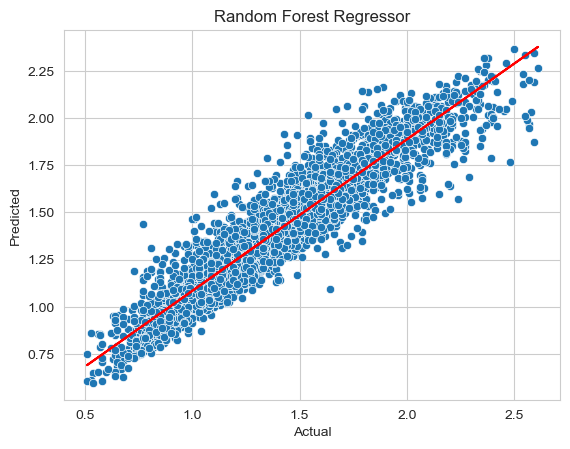

,Actual,Predict
16587,1.41,1.51942
7842,0.92,1.28290
4125,1.30,1.19026
2965,1.02,1.12324
10384,1.51,1.56914
...,...,...
12179,1.73,1.52320
9316,1.55,1.54382
12222,1.54,1.59586
14550,1.39,1.41482


In [148]:
rs = pd.DataFrame()
rs['Actual'] = y2_test
rs['Predict'] = rf22.predict(x2_test)

sns.scatterplot(data=rs, x='Actual', y='Predict')

m, b = np.polyfit(rs['Actual'], rs['Predict'], 1)
plt.plot(rs['Actual'], m * rs['Actual'] + b, color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')

plt.show()
rs